In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [9]:

image_lena='../tp1_lena/lena.png'
# Convertit l'image en niveaux de gris Y
image = cv.imread(image_lena)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1    3   12   26
   36   82  116  156  204  261  342  470  557  673  832 1017 1116 1391
 1562 1713 1792 2013 1991 2048 2075 2137 2012 2022 1856 1779 1714 1640
 1530 1367 1244 1277 1066  979  949  949  850  860  766  805  784  787
  877  803  767  862  908  904  840  908  939  953  908  896  898  929
  927  985 1064  993 1125 1129 1139 1189 1280 1340 1466 1577 1753 1812
 2018 1946 1953 1949 1879 1865 1681 1716 1524 1466 1410 1362 1392 1285
 1394 1429 1339 1394 1395 1533 1574 1543 1643 1831 1892 1942 2103 2215
 2331 2346 2418 2433 2287 2244 2204 1968 1991 1877 1881 1977 2101 2221
 2235 2291 2444 2445 2442 2330 2263 2274 2237 2255 2269 2306 2542 2644
 2782 2684 2664 2507 2253 2177 1989 1768 1698 1534 1470 1378 1262 1263
 1218 1173 1182 1304 1259 1308 1167 1201 1189 1140 1023  912  900  778
  728  660  619  619  672  668  640  676  794  772  924  923  949  944
  922 

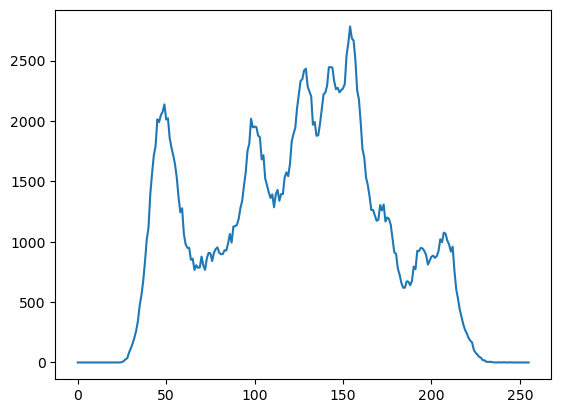

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.72747803e-04 3.89099121e-03 1.55639648e-02 4.08554077e-02
 7.58743286e-02 1.55639648e-01 2.68478394e-01 4.20227051e-01
 6.18667603e-01 8.72554779e-01 1.20523453e+00 1.66242599e+00
 2.20424652e+00 2.85890579e+00 3.66823196e+00 4.65751648e+00
 5.74310303e+00 7.09619522e+00 8.61562729e+00 1.02819443e+01
 1.20251083e+01 1.39832497e+01 1.59199905e+01 1.79121780e+01
 1.99306297e+01 2.20093918e+01 2.39665604e+01 2.59334564e+01
 2.77388763e+01 2.94693947e+01 3.11366844e+01 3.27319908e+01
 3.42202950e+01 3.55500412e+01 3.67601395e+01 3.80023384e+01
 3.90392876e+01 3.99916077e+01 4.09147453e+01 4.18378830e+01
 4.26647186e+01 4.350128

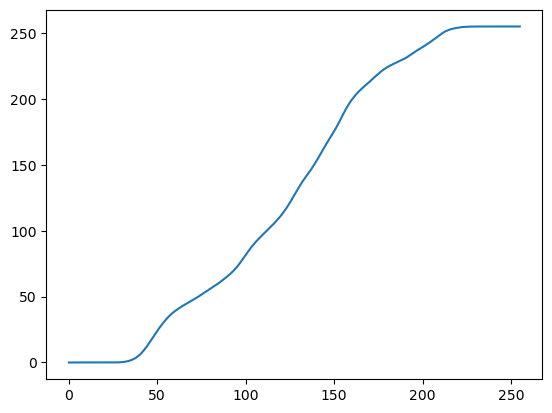

In [10]:

image_lena='../tp1_lena/lena.png'
# Convertit l'image en niveaux de gris Y
image = cv.imread(image_lena)
b,v,r = cv.split(image)         # récupère 3 matrices d'octets séparées
y = 0.299*r + 0.587*v + 0.114*b # opération matricielle
y = y.astype(np.uint8)          # convertit les réels en octets
cv.imshow("Luminance Y", y)

# Calcule l'histogramme de l'image
histo = np.zeros(256, int)      # prépare un vecteur de 256 zéros
for i in range(0,image.shape[0]):       # énumère les lignes
    for j in range(0,image.shape[1]):   # énumère les colonnes
        histo[y[i,j]] = histo[y[i,j]] + 1
print(histo)
plt.plot(histo)
plt.show()

# Calcule l'histogramme cumulé hc
hc = np.zeros(256, int)         # prépare un vecteur de 256 zéros
hc[0] = histo[0]
for i in range(1,256):
    hc[i] = histo[i] + hc[i-1]

# Normalise l'histogramme cumulé
nbpixels = y.size
hc = hc / nbpixels * 255
print(hc)
plt.plot(hc)
plt.show()

# Utilise hc comme table de conversion des niveaux de gris
for i in range(0,y.shape[0]):       # énumère les lignes
    for j in range(0,y.shape[1]):   # énumère les colonnes
        y[i,j] = hc[y[i,j]]
cv.imshow("Luminance Y après égalisation", y)
cv.waitKey(0)
cv.destroyAllWindows()